# PXL-dataset library

This is an example of the a flow where the library could be used for.

## install kaggle

In [ ]:
!pip install opendatasets
!pip install kaggle

## Init a segmentation dataset

In [2]:
from PXL_datasets.pxl_dataset_segmentation import PXL_segmentation_dataset
dataset = PXL_segmentation_dataset()

### Create custom dataset loader

In [ ]:

from PXL_datasets.pxl_dataset_loader_kaggle import PXL_dataset_loader_kaggle
from PXL_datasets.pxl_dataset_sources import PXL_dataset_sources
from PXL_datasets.pxl_dataset_types import PXL_dataset_types
from PXL_datasets.pxl_dataset_split import PXL_dataset_split

import shutil
import os
import pandas as pd
from pathlib import Path
from opendatasets import download as load_from_kaggle


class custom_loader(PXL_dataset_loader_kaggle):

    def download_dataset(self, url: str, dataset_source: PXL_dataset_sources, dataset_name: str, save_directory: str):
        super()._prepare_save_directory(save_directory)
        load_from_kaggle(url)
        split_name = dataset_name.split("/")
        path = super()._add_single_folders_to_path(split_name[-1])
        df_map = {}

        image_path = "{}/{}".format(path, "JPEGImages")
        segmentation_path = "{}/{}".format(path, "SegmentationClass")
        base_path = Path(path)
        data_split_path = "ImageSets/Segmentation"
        full_split_path = "{}/{}".format(base_path, data_split_path)
        split_directory = Path(full_split_path)
        for item in split_directory.iterdir():
            if item.is_file:
                image_paths = []
                segmentation_paths = []
                with open(item, 'r') as file:
                    for line in file:
                        image_paths.append("{}/{}.jpg".format(image_path, line.strip()))
                        segmentation_paths.append("{}/{}.png".format(segmentation_path, line.strip()))
                df = pd.DataFrame({'image': image_paths, 'segmentation_image': segmentation_paths})
                for split in PXL_dataset_split:
                    if(item.name.startswith(split.value)):
                        df_map[split.name.lower()] = df
        df_map = super()._rename_df_map_keys_to_pxl_split_names(df_map)
        return df_map
        

    def save_dataset(self, dataset_type: PXL_dataset_types, df_map: map, save_directory: str):
        super().save_dataset(dataset_type, df_map, save_directory)


In [ ]:
loader = custom_loader()

## Dowload a dataset from kaggle and save it in the specified folder

In [ ]:
dataset.load_from_url(loader=loader,
                      save_directory='lib_test/',
                      url='https://www.kaggle.com/datasets/erickendric/tree-dataset-of-urban-street-segmentation-tree')

!!! It seems that de target directory is not empty! Do you want to continue and clear the directory? (y/N):
Skipping, found downloaded files in "./tree-dataset-of-urban-street-segmentation-tree" (use force=True to force download)
saving into:  lib_test/train/
saving into:  lib_test/test/
saving into:  lib_test/validation/


## Load the dataset from directory
When the dataset is dowloaded in a previous session, it does not need to be downloaded any more. It can be loaded from the directory.

In [ ]:
dataset.load_from_save_dir('lib_test/')

## Display random samples of the dataset from a specified split

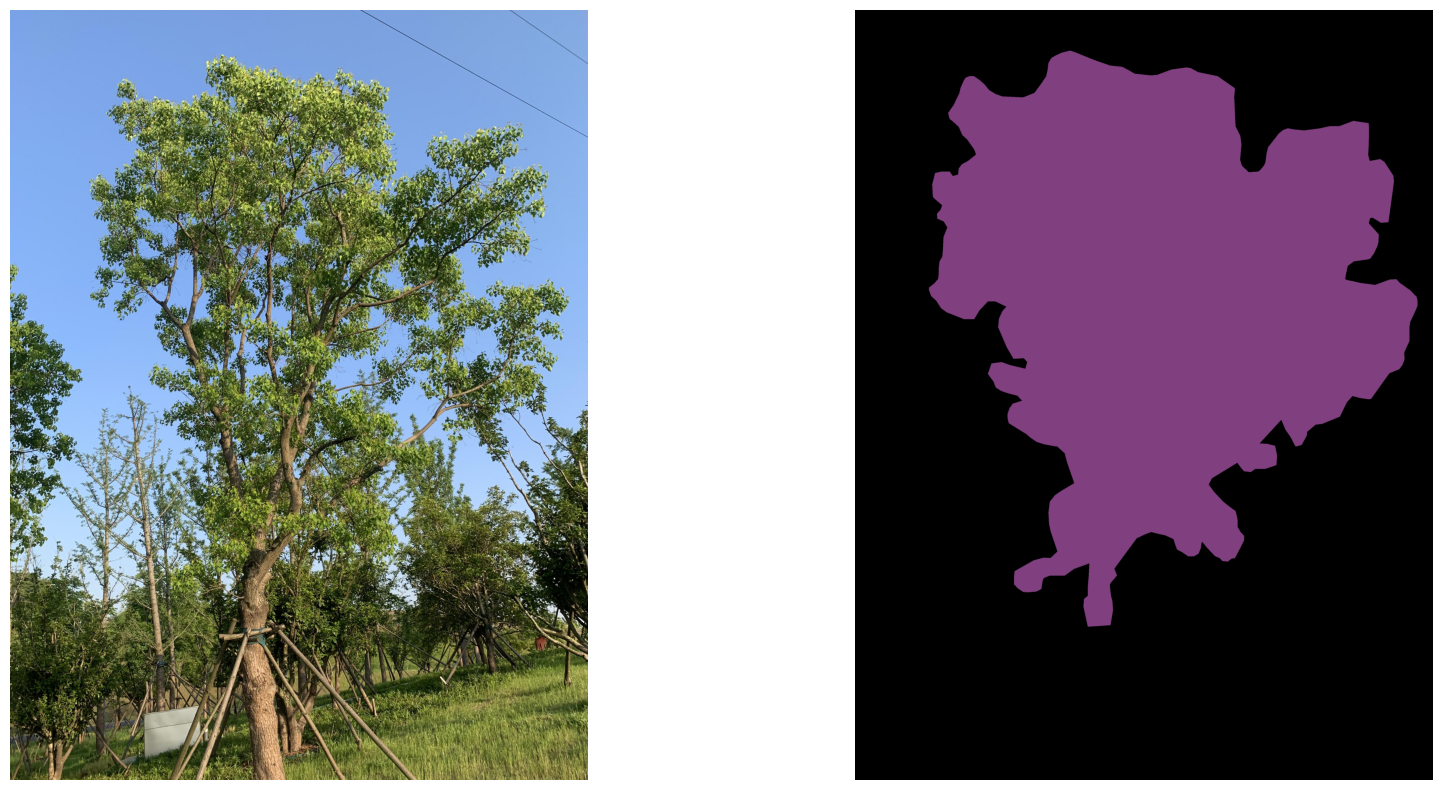

In [ ]:
from PXL_datasets.pxl_dataset_split import PXL_dataset_split
dataset.display_random_image(PXL_dataset_split.Train)

## Convert the dataset to object detection

In [ ]:
dataset = dataset.convert_to_object_detection_dataset('test_lib_obj/')

Converting images into bounding boxes...
!!! It seems that de target directory is not empty! Do you want to continue and clear the directory? (y/N):
saving into:  test_lib_obj/test/
saving into:  test_lib_obj/train/
saving into:  test_lib_obj/validation/


The type of the instance also gets converted so the functions of this dataset type are available.

In [ ]:
print(type(dataset))

<class 'PXL_datasets.pxl_dataset_object_detection.PXL_object_detection_dataset'>


## Load from a directory

In [2]:
from PXL_datasets.pxl_dataset_object_detection import PXL_object_detection_dataset
dataset = PXL_object_detection_dataset()
dataset.load_from_save_dir('test_lib_obj/')

{'test':                                                  image  \
 0    test_lib_obj/test/Triadica sebifera_tree_1 (16...   
 1    test_lib_obj/test/Magnolia liliflora Desr_tree...   
 2    test_lib_obj/test/Sapindus saponaria_tree_1 (2...   
 3      test_lib_obj/test/Cedrus deodara_tree_1 (7).png   
 4     test_lib_obj/test/Ginkgo biloba_tree_1 (223).png   
 ..                                                 ...   
 370    test_lib_obj/test/Acer palmatum_tree_1 (14).png   
 371  test_lib_obj/test/Magnolia liliflora Desr_tree...   
 372         test_lib_obj/test/Platanus_tree_1 (14).png   
 373  test_lib_obj/test/Koelreuteria paniculata_tree...   
 374  test_lib_obj/test/Koelreuteria paniculata_tree...   
 
                                                objects  
 0    [{'name': '0', 'centerNSize': ['0.853009', '0....  
 1    [{'name': '0', 'centerNSize': ['0.0935847', '0...  
 2    [{'name': '0', 'centerNSize': ['0.886409', '0....  
 3    [{'name': '0', 'centerNSize': ['0.0892857', 

## Display random samples

In [ ]:
from PXL_datasets.pxl_dataset_split import PXL_dataset_split
dataset.display_random_image(PXL_dataset_split.Train)

## Edit bounding boxes manually or just select the good ones.

In [ ]:
from PXL_datasets.pxl_dataset_split import PXL_dataset_split
dataset.manual_improve_data(dataset.df_map[PXL_dataset_split.Validation.name.lower()], 'manual_box_save/', 182)

## Replace the old objects by the new ones

In [4]:
dataset.replace_object_files("manual_box_save/", "old_labels_test/")

In [ ]:
from PXL_datasets.pxl_dataset_split import PXL_dataset_split
dataset.display_random_image(PXL_dataset_split.Validation)

## Print dataset information

In [3]:
dataset.print_dataset_information()

DATASET OVERVIEW:
Type:	Object_Detection
Total number of rows:
	3829
Number of rows per split:
	Train:
		3070	80.17759206059023%
	Test:
		375	9.793679811961347%
	Validation:
		384	10.02872812744842%
Number of objects per split:
	Train:
		12607
	Test:
		1478
	Validation:
		1540
